In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import nltk
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blackpantherimg/black-panther-mask.png
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Captain.America.Civil.War.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Thor.Ragnarok.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Spider-Man.Far.From.Home.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Avengers.Age.of.Ultron.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Black.Panther.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Captain.America.The.Winter.Soldier.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Avengers.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Thor.The.Dark.World.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Spider-Man.Homecoming.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Guardians.of.the.Galaxy.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Ant-Man.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset

In [2]:
import nltk
import pandas as pd
import numpy as np
from pandas import DataFrame
from nltk.stem import WordNetLemmatizer
import operator
from nltk import pos_tag 

# If you would like to work with the raw text you can use 'moby_raw'
with open('../input/marvel-cinematic-universe-dialogue-dataset/Black.Panther.txt', 'r', encoding='latin-1') as f:
    moby_raw = f.read()
    
# If you would like to work with the novel in nltk.Text format you can use 'text1'
moby_tokens = nltk.word_tokenize(moby_raw)
text1 = nltk.Text(moby_tokens)

In [3]:
x = sorted([(freq, token) for token, freq in text1.vocab().items() if len(token) > 5 and freq > 11 ], key=operator.itemgetter(0), reverse=True) 
print(x)

[(45, 'Wakanda'), (32, "T'Challa"), (22, 'vibranium'), (19, 'father'), (19, 'people'), (16, 'challenge'), (12, 'around'), (12, 'Panther')]


In [4]:
df = DataFrame (x,columns=['freq','words'])
print (df)

   freq      words
0    45    Wakanda
1    32   T'Challa
2    22  vibranium
3    19     father
4    19     people
5    16  challenge
6    12     around
7    12    Panther


In [5]:
df['POS Tags']= nltk.pos_tag(df['words'])
print(df['POS Tags'])

0      (Wakanda, NNP)
1     (T'Challa, NNP)
2     (vibranium, NN)
3        (father, NN)
4       (people, NNS)
5    (challenge, VBP)
6        (around, IN)
7      (Panther, NNP)
Name: POS Tags, dtype: object


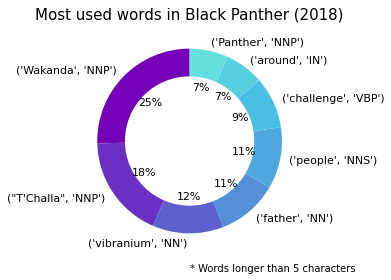

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ax= plt.gca()
colors = ['#7400b8', '#6930c3', '#5e60ce', '#5390d9','#4ea8de','#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
df.plot(kind='pie', colors=colors, y = 'freq', ax=ax, 
 startangle=90, shadow=False, autopct='%1.f%%', labels=df['POS Tags'], legend = False, fontsize=11)

centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_xlabel('* Words longer than 5 characters',horizontalalignment='left',
        verticalalignment='top',labelpad=20)
plt.ylabel('') 
ax.axis('equal') 

ax.set_title('Most used words in Black Panther (2018)', fontsize=15, pad=21)


plt.tight_layout()
plt.show()